In [1]:
# Naive Bayes in Python and Spam-filtering using Multinomial Naive Bayes
# Version -3 - Just adding this comment to test Github Branch and Commit
# Have Used: NLTK concepts: Tokeniser, Stop- words, Multi-nomial naive Bayes and LabelEncoder, TfidfVectoriser


In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [4]:
# Loading the iris dataset:

iris = datasets.load_iris()

In [5]:
# Setting X and Y variables:

X = DataFrame(iris.data, columns = iris.feature_names)

Y = DataFrame(iris.target, columns = ["Target"])

In [6]:
X.head() , Y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
    Target
 0       0
 1       0
 2       0
 3       0
 4       0)

In [7]:
# Fitting the Naive Bayes Model:

In [8]:
model = GaussianNB()

In [9]:
# Creating a Train-Test Split

from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Now we Fit the model of the training data:

model.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [11]:
predicted = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


In [13]:
confusion_matrix(Y_test, predicted)

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  1,  7]], dtype=int64)

In [14]:
accuracy_score(Y_test, predicted)

0.9473684210526315

In [15]:
########################################################################################
########################################################################################
########################################################################################

                # Spam Classification using Multinomial Naive Bayes:

########################################################################################
########################################################################################
########################################################################################

In [16]:
emails = pd.read_csv('spam.csv', sep = ',',  encoding='latin-1')

In [17]:
emails = emails.iloc[:,0:2]

In [18]:
emails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
emails.shape

(5572, 2)

In [20]:
# Lowercasing the senteces column:

emails['v2'] = emails.v2.str.lower()

emails.head()


,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [21]:
emails.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [22]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
 

[nltk_data] Downloading package punkt to C:\Users\anuj -
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
emails.dtypes

v1    object
v2    object
dtype: object

In [24]:
emails['sentence'] = (list(emails['v2']))

In [25]:
emails.head()

,v1,v2,sentence
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [26]:
sum(emails.sentence.isna())

0

In [27]:
emails.groupby('v1').describe()

sentence                                                                 \
        count unique                                                top freq   
v1                                                                             
ham      4825   4515                             sorry, i'll call later   30   
spam      747    653  please call our customer service representativ...    4   

        v2                                                                 
     count unique                                                top freq  
v1                                                                         
ham   4825   4515                             sorry, i'll call later   30  
spam   747    653  please call our customer service representativ...    4

In [28]:
tokens = emails.sentence.apply(word_tokenize)
emails['tokens']  = tokens

In [29]:
tokens.head()

0    [go, until, jurong, point, ,, crazy.., availab...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, ,,...
Name: sentence, dtype: object

In [30]:
# Length of Sentences:

In [31]:
emails['length'] = emails.sentence.apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016637529390>,
      dtype=object)

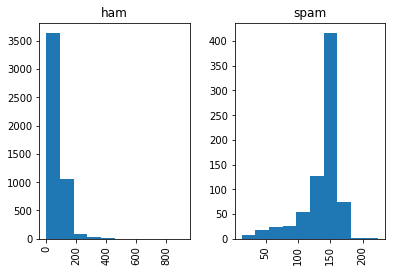

In [32]:
# Plotting Histogram for length of sentence for spam vs notspam
emails.hist('length' , by = 'v1')

In [33]:
emails.sentence.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: sentence, dtype: object

In [34]:
emails.head()

,v1,v2,sentence,tokens,length
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49
4,ham,"nah i don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...",61


In [35]:
# Removing the Stop Words:

# step1:
# Looking at English Stop Words First
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_en = stopwords.words('english')
#print(stopwords_en)


[nltk_data] Downloading package stopwords to C:\Users\anuj -
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Removing the Stop Words:

# step2:

#emails['sentence_stop_removed']= [word for word in emails.sentence if not word in stopwords_en ]

def stop_removal(tokens):
    sentence_stop_removed = [] 
    for w in tokens:
        if w not in stopwords_en: 
            sentence_stop_removed .append(w) 
    return (sentence_stop_removed )

emails['sentence_stop_removed'] = emails.tokens.apply(stop_removal)
                                                      
                                                      
emails['sentence_stop_removed'].head() 

emails['length_2'] = emails['sentence_stop_removed'].apply(len)

emails[['length','length_2']].head(20)

,length,length_2
0,111,19
1,29,8
2,155,30
3,49,11
4,61,9
5,148,25
6,77,10
7,160,20
8,158,23
9,154,20


In [37]:
from string import punctuation
# It's a string so we have to them into a set type
punctuation = punctuation + '.'

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~.'

In [38]:
# Removing Punctuations Now:

from string import punctuation
# It's a string so we have to them into a set type
punctuation


def punc_removal(tokens):
    sentence_stop_punc_removed = [] 
    for w in tokens:
        if w not in punctuation: 
            sentence_stop_punc_removed .append(w) 
    return (sentence_stop_punc_removed )

emails['sentence_stop_punc_removed'] = emails.sentence_stop_removed.apply(punc_removal)

emails['sentence_stop_removed'].head(), emails['sentence_stop_punc_removed'].head() 
#temp_str = str(emails['sentence_stop_removed'])


(0    [go, jurong, point, ,, crazy.., available, bug...
 1             [ok, lar, ..., joking, wif, u, oni, ...]
 2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
 3    [u, dun, say, early, hor, ..., u, c, already, ...
 4    [nah, n't, think, goes, usf, ,, lives, around,...
 Name: sentence_stop_removed, dtype: object,
 0    [go, jurong, point, crazy.., available, bugis,...
 1             [ok, lar, ..., joking, wif, u, oni, ...]
 2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
 3    [u, dun, say, early, hor, ..., u, c, already, ...
 4    [nah, n't, think, goes, usf, lives, around, th...
 Name: sentence_stop_punc_removed, dtype: object)

In [39]:
emails['length_3'] = emails['sentence_stop_punc_removed'].apply(len)

emails[['length','length_2','length_3']].head(20)

,length,length_2,length_3
0,111,19,18
1,29,8,8
2,155,30,27
3,49,11,11
4,61,9,8
5,148,25,21
6,77,10,8
7,160,20,16
8,158,23,18
9,154,20,18


In [40]:
# Converting the column - emails.sentence_stop_punc_removed from a list of token to a string or sentence:
# That is converting a pandas DF list to a String:

emails.sentence_stop_punc_removed = emails.sentence_stop_punc_removed.apply(', '.join)

emails.head(2)


,v1,v2,sentence,tokens,length,sentence_stop_removed,length_2,sentence_stop_punc_removed,length_3
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111,"[go, jurong, point, ,, crazy.., available, bug...",19,"go, jurong, point, crazy.., available, bugis, ...",18
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29,"[ok, lar, ..., joking, wif, u, oni, ...]",8,"ok, lar, ..., joking, wif, u, oni, ...",8


In [41]:
# Stemming in python:
# Example: working, worked, workable --- work

from nltk.stem import PorterStemmer
porter = PorterStemmer()


def stem_removal(tokens):
    stem_removed = [] 
    stem_removed.append(porter.stem(tokens)) 
    return (stem_removed )

emails['sentence_stop_punc_stem_removed'] = emails.sentence_stop_punc_removed.apply(stem_removal)

emails.head(2)


,v1,v2,sentence,tokens,length,sentence_stop_removed,length_2,sentence_stop_punc_removed,length_3,sentence_stop_punc_stem_removed
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111,"[go, jurong, point, ,, crazy.., available, bug...",19,"go, jurong, point, crazy.., available, bugis, ...",18,"[go, jurong, point, crazy.., available, bugis,..."
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29,"[ok, lar, ..., joking, wif, u, oni, ...]",8,"ok, lar, ..., joking, wif, u, oni, ...",8,"[ok, lar, ..., joking, wif, u, oni, ...]"


In [42]:
emails.sentence_stop_punc_stem_removed = emails.sentence_stop_punc_stem_removed.apply(', '.join)

In [43]:
emails.head(2)

,v1,v2,sentence,tokens,length,sentence_stop_removed,length_2,sentence_stop_punc_removed,length_3,sentence_stop_punc_stem_removed
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111,"[go, jurong, point, ,, crazy.., available, bug...",19,"go, jurong, point, crazy.., available, bugis, ...",18,"go, jurong, point, crazy.., available, bugis, ..."
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29,"[ok, lar, ..., joking, wif, u, oni, ...]",8,"ok, lar, ..., joking, wif, u, oni, ...",8,"ok, lar, ..., joking, wif, u, oni, ..."


In [44]:
emails['length_4'] = emails['sentence_stop_punc_stem_removed'].apply(len)

emails[['length','length_2','length_3','length_4']].head(20)

,length,length_2,length_3,length_4
0,111,19,18,109
1,29,8,8,38
2,155,30,27,166
3,49,11,11,53
4,61,9,8,49
5,148,25,21,115
6,77,10,8,50
7,160,20,16,129
8,158,23,18,139
9,154,20,18,126


In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

emails['v1_le'] = le.fit_transform(emails['v1'])

v1_le = le.fit_transform(emails['v1'])

le.classes_


array(['ham', 'spam'], dtype=object)

In [46]:
v1_le

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:

from sklearn.feature_extraction.text import TfidfVectorizer


#temp_new = emails.sentence.apply(LabelEncoder().fit_transform)
tfdifv = TfidfVectorizer()

temp_new_tfdif = tfdifv.fit_transform(emails['sentence'])


In [48]:
temp_new_tfdif

<5572x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [49]:
emails['tokens_2'] = temp_new_tfdif
emails.head()

,v1,v2,sentence,tokens,length,sentence_stop_removed,length_2,sentence_stop_punc_removed,length_3,sentence_stop_punc_stem_removed,length_4,v1_le,tokens_2
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111,"[go, jurong, point, ,, crazy.., available, bug...",19,"go, jurong, point, crazy.., available, bugis, ...",18,"go, jurong, point, crazy.., available, bugis, ...",109,0,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."
1,ham,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",29,"[ok, lar, ..., joking, wif, u, oni, ...]",8,"ok, lar, ..., joking, wif, u, oni, ...",8,"ok, lar, ..., joking, wif, u, oni, ...",38,0,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",30,"free, entry, 2, wkly, comp, win, fa, cup, fina...",27,"free, entry, 2, wkly, comp, win, fa, cup, fina...",166,1,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,"[u, dun, say, early, hor, ..., u, c, already, ...",11,"u, dun, say, early, hor, ..., u, c, already, s...",11,"u, dun, say, early, hor, ..., u, c, already, s...",53,0,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."
4,ham,"nah i don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...",61,"[nah, n't, think, goes, usf, ,, lives, around,...",9,"nah, n't, think, goes, usf, lives, around, though",8,"nah, n't, think, goes, usf, lives, around, though",49,0,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(emails['sentence_stop_punc_stem_removed'],emails['v1_le'])

In [51]:
X_train.shape , Y_train.shape

((4179,), (4179,))

In [133]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
       ('tfidf',TfidfVectorizer()), # 
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [134]:
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [135]:
actuals = Y_test
predictions = pipeline.predict(X_test)

In [175]:
actuals

2914    0
2779    0
3134    0
1659    0
5380    0
67      1
1589    0
5466    1
328     0
2765    0
1414    0
4034    1
711     0
173     0
434     0
2439    0
5007    0
1613    0
405     0
2937    0
2358    0
4574    0
5291    0
4954    0
2661    0
1730    0
1158    0
426     0
3672    0
1958    0
       ..
4757    1
4734    0
5337    0
98      0
4223    0
184     0
4398    0
5217    0
671     1
4193    0
1427    0
2843    0
2981    0
2907    0
1933    0
995     0
5345    0
3179    0
4853    0
757     0
461     0
1445    0
1409    0
1042    0
1770    0
4326    0
1692    0
5258    0
3492    0
4190    0
Name: v1_le, Length: 1393, dtype: int64

In [174]:
import numpy as np
array_actuals = np.array(Y_test)
array_actuals
Series(predictions)

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1363    1
1364    0
1365    0
1366    0
1367    0
1368    0
1369    0
1370    0
1371    0
1372    0
1373    0
1374    0
1375    0
1376    0
1377    0
1378    0
1379    0
1380    0
1381    0
1382    0
1383    0
1384    0
1385    0
1386    0
1387    0
1388    0
1389    0
1390    0
1391    0
1392    0
Length: 1393, dtype: int64

In [151]:
confusion_matrix(actuals,predictions)

array([[1208,    2],
       [  47,  136]], dtype=int64)

In [137]:
accuracy_score(actuals,predictions)

0.964824120603015

In [165]:
precision_score(actuals,predictions)

0.9855072463768116

Text(0.5,1,'ROC curve')

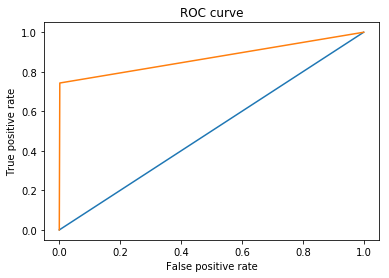

In [166]:
# ROC Curve:

fpr, tpr, thresholds = metrics.roc_curve(actuals,predictions)
metrics.auc(fpr, tpr)

plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

#there is a library skplot just to have other graphs like Lift, precision/recall curve etc

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


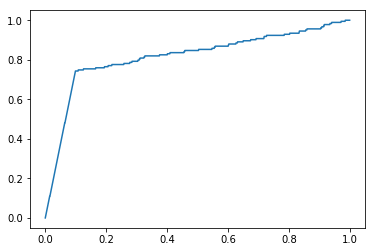

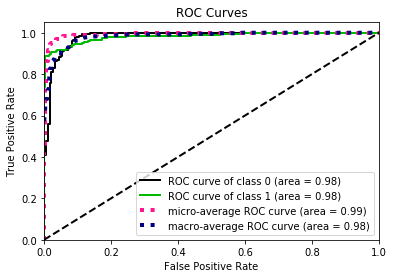

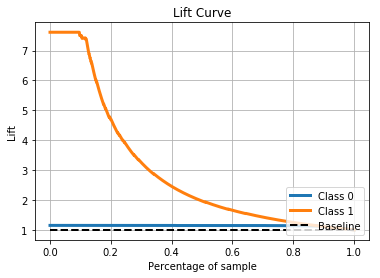

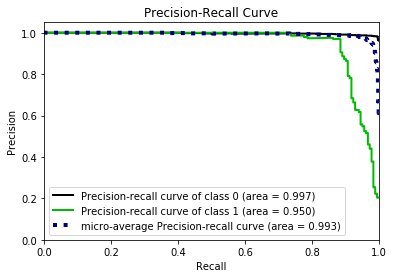

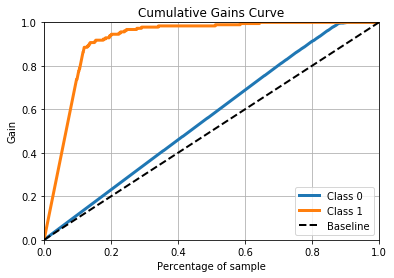

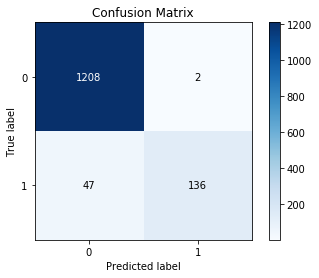

In [193]:
############################################ scikit-plot library ################################################
# Using scikit-plot library: which is like a supplement library to scikit-learn for plotting curves of scikit-learn model output:

actuals

from scikitplot import metrics as spmetrics

percentages, gains = spmetrics.cumulative_gain_curve(actuals, predictions)

plt.plot(percentages, gains)

#spmetrics.plot_lift_curve((actuals),(predictions))

# Use pipeline.predict_proba(X_test) = Y_Probas
spmetrics.plot_roc((actuals),(pipeline.predict_proba(X_test)))

spmetrics.plot_lift_curve((actuals),(pipeline.predict_proba(X_test)))
spmetrics.plot_precision_recall((actuals),(pipeline.predict_proba(X_test)))
spmetrics.plot_cumulative_gain((actuals),(pipeline.predict_proba(X_test)))
spmetrics.plot_confusion_matrix((actuals),predictions)


In [141]:
# We are done with machine learning model, next we will lokk at building a word cloud for Spam message and 
#  also do some frequency plot for words which show up the maximum in plots:

In [142]:
emails.head(1)

,v1,v2,sentence,tokens,length,sentence_stop_removed,length_2,sentence_stop_punc_removed,length_3,sentence_stop_punc_stem_removed,length_4,v1_le,tokens_2
0,ham,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...",111,"[go, jurong, point, ,, crazy.., available, bug...",19,"go, jurong, point, crazy.., available, bugis, ...",18,"go, jurong, point, crazy.., available, bugis, ...",109,0,"(0, 3550)\t0.1481298737377147\n (0, 8030)\t..."


In [143]:
from nltk.probability import FreqDist

# Importing Regex Tokenizer for just tokenising words and ignoring , and .
from nltk.tokenize import RegexpTokenizer
regex_tokenizer = RegexpTokenizer(r'\w+')

final_words = emails['sentence_stop_punc_stem_removed'][emails['v1_le'] == 1].apply(regex_tokenizer.tokenize)
t_final_words = tuple(final_words)

# Need to unpack Tuple for it to work with FreqDist:
l_final_words = []
for list in t_final_words:
    for word in list:
            l_final_words.append(word)

l_final_words
    
    
fdist_spam = FreqDist(l_final_words)

In [144]:
fdist_spam.items()

dict_items([('free', 222), ('entry', 26), ('2', 206), ('wkly', 14), ('comp', 10), ('win', 64), ('fa', 4), ('cup', 5), ('final', 16), ('tkts', 4), ('21st', 2), ('may', 7), ('2005', 3), ('text', 125), ('87121', 4), ('receive', 33), ('question', 7), ('std', 11), ('txt', 165), ('rate', 18), ('c', 59), ('s', 83), ('apply', 20), ('08452810075over18', 2), ('freemsg', 14), ('hey', 5), ('darling', 2), ('3', 45), ('week', 60), ('word', 25), ('back', 23), ('d', 5), ('like', 13), ('fun', 9), ('still', 7), ('tb', 1), ('ok', 5), ('xxx', 11), ('chgs', 1), ('send', 70), ('å', 299), ('1', 111), ('50', 57), ('rcv', 2), ('winner', 15), ('valued', 11), ('network', 25), ('customer', 47), ('selected', 25), ('receivea', 2), ('900', 7), ('prize', 87), ('reward', 11), ('claim', 113), ('call', 349), ('09061701461', 2), ('code', 30), ('kl341', 2), ('valid', 24), ('12', 6), ('hour', 2), ('mobile', 126), ('11', 12), ('months', 3), ('u', 174), ('r', 44), ('entitled', 8), ('update', 19), ('latest', 36), ('colour', 1

In [145]:
# Now Plotting the top words in Spam:

import matplotlib.pyplot as plt
%matplotlib inline

sorted_words_spam = sorted(fdist_spam.items(), reverse = True, key=lambda x: x[1])
sorted_words_spam

sorted_words_spam_25 = sorted_words_spam[0:25]
sorted_words_spam_25

[('call', 349),
 ('å', 299),
 ('free', 222),
 ('2', 206),
 ('u', 174),
 ('txt', 165),
 ('ur', 144),
 ('4', 137),
 ('mobile', 126),
 ('text', 125),
 ('stop', 121),
 ('claim', 113),
 ('1', 111),
 ('reply', 103),
 ('www', 98),
 ('prize', 87),
 ('get', 86),
 ('s', 83),
 ('cash', 76),
 ('uk', 74),
 ('150p', 71),
 ('send', 70),
 ('new', 69),
 ('nokia', 67),
 ('win', 64)]

<BarContainer object of 25 artists>

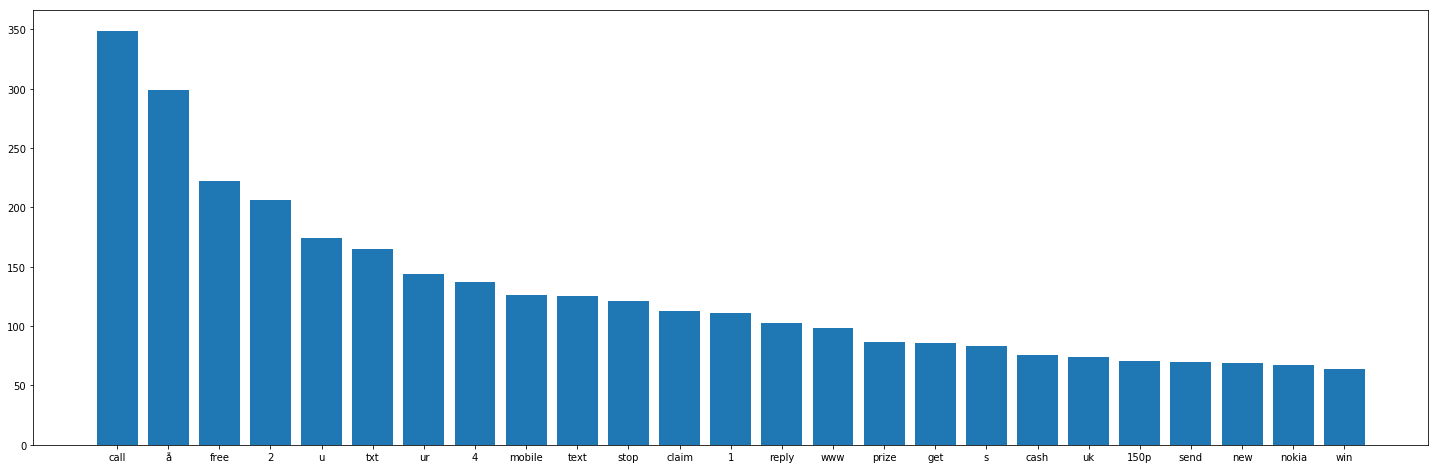

In [146]:
temp_df = DataFrame(sorted_words_spam_25, columns = ['word','count'])

plt.figure(figsize=(25,8))

plt.bar( temp_df['word'], temp_df['count'])

In [147]:
# Now we will use wordcloud to plot a word cloud of list of final spam words = l_final_words 
# ( which needs to be converted to a string) after all text-processing that we have done:

from wordcloud import WordCloud

wc = WordCloud(width=3000, height=1500)
wc_plot = wc.generate(str(l_final_words))


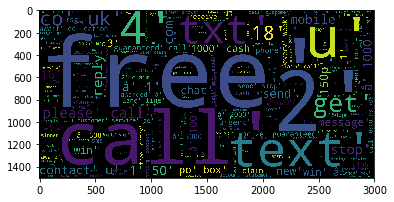

<Figure size 44800x19600 with 0 Axes>

In [148]:
plt.imshow(wc_plot)
plt.figure(figsize=(32,14), dpi=1400)


# plt.imshow is used to : Display an image, i.e. data on a 2D regular raster.
#(plt.axis([0,160,0,40]))
plt.tight_layout(pad=0)
plt.show()